<a href="https://colab.research.google.com/github/kankeinai/Machine_learning_tutorials/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of CNN from scratch

In this notebook, I will follow instructions described in "The Independent Code" tutorials and implement CNN from scratch. 

At first, I will start from Dense Layer, which technically Neural Network Layer (?). 

**Machine learning steps**
1. Food input. Data flows from layer to layer. Retrieve output. $$y=\text{network}(x,\omega)$$

2. Calculate the error $$\text{e.g. } E=\frac{1}{2}(y^*-y)^2$$

3. Adjust the parameters using **_gradient descent_** $$w\leftarrow w - \alpha\frac{\partial E}{\partial\omega}$$

4. Start again



When you give input to Layer it gives you an output, which is called **forward** propagation. **Backpropagation** is when layer updates its parameters.
<center><img src="https://i.ibb.co/ZM9f7fF/2022-02-25-15-56-47.png" alt="2022-02-25-15-56-47" width = "400" border="0"></center>

$$\frac{\partial E}{\partial W} = \frac{\partial E}{\partial Y}\frac{\partial Y}{\partial W}$$

$$\frac{\partial E}{\partial X}=\frac{\partial E}{\partial Y}\frac{\partial Y}{\partial X}$$
We will need the latter formula since most of neural networks are sequential:

<center>
<img src="https://i.ibb.co/0sNMjZK/2022-02-25-16-02-17.png" alt="2022-02-25-16-02-17"  width = "800" border="0">
</center>

In [1]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
7
    def forward(self, input):
        pass

    def backward(self, output_gradient,  lrn_rate):
        pass

##Dense Layer

**Dense Layer** connects $i$ neurons with $j$ neurons. The neurons $i$ and $j$ are connceted through weight $\omega_{ji}$:
<center><img src="https://i.ibb.co/s2CGHZM/2022-02-25-16-11-37.png" alt="2022-02-25-16-11-37" width="600 border="0"></center>



###Formula for forward propagation
The forward propagation can be easily rewritten through matrix multiplication:
$$
\underset{j\times 1} {\begin{bmatrix} y_1 \\ y_2 \\ \vdots  \\ y_j \end{bmatrix}} =
\underset{j\times i}{\begin{bmatrix}
\omega_{11} & \omega_{12} & \cdots & \omega_{1i}\\
\omega_{21} & \omega_{22} & \cdots & \omega_{2i} \\ 
\vdots & \vdots & \ddots & \vdots \\
\omega_{j1} & \omega_{j2} & \cdots & \omega_{ji}
\end{bmatrix}}\times
\underset{i\times 1}{\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_i\end{bmatrix}}
+\underset{j\times 1}{\begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_j \end{bmatrix}} 
$$

###Formulas for backpropagation
Gradient of weights:
$$\frac{\partial E}{\partial W}=  \underset{j\times i}{\begin{bmatrix}
\frac{\partial E}{\partial\omega_{11}} & \frac{\partial E}{\omega_{12}} & \cdots & \frac{\partial E}{\omega_{1i}}\\
\frac{\partial E}{\omega_{21}} & \frac{\partial E}{\omega_{22}} & \cdots & \frac{\partial E}{\omega_{2i}} \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial E}{\omega_{j1}} & \frac{\partial E}{\omega_{j2}} & \cdots & \frac{\partial E}{\omega_{ji}}
\end{bmatrix}}=\underset{j\times i}{\begin{bmatrix}
\frac{\partial E}{\partial y_{1}}x_1 & \frac{\partial E}{\partial y_{1}}x_2 & \cdots & \frac{\partial E}{\partial y_{1}}x_i\\
\frac{\partial E}{\partial y_{2}}x_1 & \frac{\partial E}{\partial y_{2}}x_2 & \cdots & \frac{\partial E}{\partial y_{2}}x_i \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial E}{\partial y_{j}}x_1 & \frac{\partial E}{\partial y_{j}}x_2 & \cdots & \frac{\partial E}{\partial y_{j}}x_i
\end{bmatrix}}= \underset{j\times 1} {\begin{bmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots  \\ \frac{\partial E}{\partial y_j} \end{bmatrix}}\underset{1\times i}{\begin{bmatrix}x_1 & x_2 & \cdots & x_i\end{bmatrix}}=\frac{\partial E}{\partial Y}\cdot X^T$$
Gradient of bias term:
$$\frac{\partial E}{\partial B} = \begin{bmatrix}\frac{\partial E}{\partial b_1}\\\frac{\partial E}{\partial b_2}\\\vdots\\\frac{\partial E}{\partial b_j}\end{bmatrix}=\frac{\partial E}{\partial Y}\frac{\partial Y}{\partial B}=\frac{\partial E}{\partial Y}$$
Gradient of input:
$$\frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y}\frac{\partial Y}{\partial X}$$
Since, $$\frac{\partial E}{\partial x_i} = \frac{\partial E}{\partial y_1}\omega_{1i}+\frac{\partial E}{\partial y_2}\omega_{2i}+\cdots+\frac{\partial E}{\partial y_j}\omega_{ji}$$
We can write a common formula for $\frac{\partial E}{\partial X}$: \\
$$\frac{\partial E}{\partial X} = W^T\cdot\frac{\partial E}{\partial Y}$$

In [2]:
import numpy as np

class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

##Activation Layer

Forward formula:
$$Y=f(X)$$
Gradient for activation function:
$$\frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y} \odot f'(X)$$
where $\odot$ sign means element-wise multiplication or hadamard product.

In [3]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

## Activation function and loss function

###Tanh

In [4]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)


##Mean squared error

$$E = \frac{1}{n}\sum_i(y_i^*-y_i)^2$$

In [5]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

$$\frac{\partial E}{\partial y_i}=\frac{2}{n}(y_i-y^*_i)$$
$$\frac{\partial E}{\partial Y}=\frac{2}{n}(Y-Y^*_i)$$

In [6]:
def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

## Final Implementation

<center><img src="https://i.ibb.co/YkJsTVG/2022-02-25-17-37-04.png" alt="2022-02-25-17-37-04" border="0" width="600"></center>

In [7]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

In [8]:
def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, lrn_rate = 0.01, verbose = True):
    for it in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = x
            for layer in network:
                output = layer.forward(output)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            
            for layer in reversed(network):
                grad = layer.backward(grad, lrn_rate)

        error /= len(x_train)
        if verbose:
            print(f"{it + 1}/{epochs}, error={error}")

In [24]:
X = np.reshape([[0,0],[0,1],[1,0],[1,1]],(4,2,1))
Y = np.reshape([[0],[1],[1],[0]], (4,1,1))
X

array([[[0],
        [0]],

       [[0],
        [1]],

       [[1],
        [0]],

       [[1],
        [1]]])

In [22]:
network = [
           Dense(2,3), 
           Tanh(),
           Dense(3,1),
           Tanh()
]
epochs = 1000
lrn_rate = 0.01

In [23]:
train(network, mse, mse_prime, X, Y, epochs, lrn_rate=0.1)

1/1000, error=0.4832437280918086
2/1000, error=0.3886639560241246
3/1000, error=0.37089884534168005
4/1000, error=0.3618921258765142
5/1000, error=0.35563239370924493
6/1000, error=0.3510002105449193
7/1000, error=0.34756258802698803
8/1000, error=0.34503302749638565
9/1000, error=0.3431834046288209
10/1000, error=0.34183217340155453
11/1000, error=0.3408396894008138
12/1000, error=0.3401014719393385
13/1000, error=0.339540738909621
14/1000, error=0.33910171405455375
15/1000, error=0.338744230596851
16/1000, error=0.3384395989308262
17/1000, error=0.3381675176726514
18/1000, error=0.3379137886890524
19/1000, error=0.33766863385731505
20/1000, error=0.3374254572155314
21/1000, error=0.3371799357954395
22/1000, error=0.336929353053613
23/1000, error=0.3366721115269314
24/1000, error=0.3364073779641689
25/1000, error=0.33613482634802716
26/1000, error=0.335854453154263
27/1000, error=0.33556644578773487
28/1000, error=0.33527109002377675
29/1000, error=0.33496870592047934
30/1000, error=0

### Visualisation

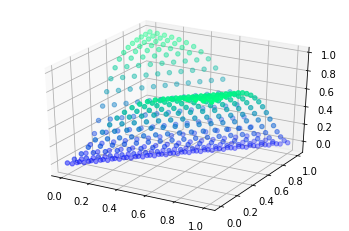

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()

In [27]:
predict(network, [[-0.2],[0.5]])

array([[0.9355097]])

##Convolution Layer

In [14]:
def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [15]:
from scipy import signal

class Convolutional(Layer):
    
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size+1 )
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i,j], "valid")
            
        return self.output
    
    def backward(self, output_gradient, lrn_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i,j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i,j], "full")
        
        self.kernels -= lrn_rate * kernels_gradient
        self.biases -= lrn_rate * output_gradient

        return input_gradient

In [16]:
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
    
    def forward(self, input):
        return np.reshape(input, self.output_shape)
    
    def backward(self, output_gradient, lrn_rate):
        return np.reshape(output_gradient, self.input_shape)

In [17]:
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1/(1+np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s *(1-s)
        super().__init__(sigmoid, sigmoid_prime)


In [18]:
def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 2, 1)
    return x, y

In [19]:
from keras.datasets import mnist
from keras.utils import np_utils
# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [20]:
# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 2),
    Sigmoid()
]

# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=20,
    lrn_rate=0.1
)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")

1/20, error=0.30175016739851546
2/20, error=0.11468253096093287
3/20, error=0.026457571606070936
4/20, error=0.013111338277694007
5/20, error=0.009743223333369576
6/20, error=0.007332646352533791
7/20, error=0.005942162455232897
8/20, error=0.004716954456553662
9/20, error=0.003599495487629763
10/20, error=0.0030283258450445427
11/20, error=0.0027154967660053563
12/20, error=0.002525291151981271
13/20, error=0.002380051280394594
14/20, error=0.002255166586206142
15/20, error=0.0021443625324221813
16/20, error=0.002044590554054379
17/20, error=0.0019539060458240803
18/20, error=0.001870901966453146
19/20, error=0.0017944953584326617
20/20, error=0.00172385608159893
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred